In [ ]:
# analisando o IBOVESPA com Python
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
# import pandas_datareader.data as pdr # versão 3.12 do python que estou sando não possui superte ao datareader enteão usei o yfinance mesmo
from datetime import datetime, timedelta
# yf.pdr_override() # sobrescreve o método de leitura do pandas datareader para usar o yfinance



Analizando o Grafico do IBOVESPA com Python

In [70]:
data_inicial = datetime.now() - timedelta(days=120) # 120 dias atrás   
data_final = datetime.now() # data atual

# df = yf.download('^BVSP', start=data_inicial, end=data_final)
# df = yf.download(["^BVSP","ITUB4.SA","PETR3.SA"], start=data_inicial, end=data_final) #pode-se passar mais de um ativo separando por vírgula
# pode-se pegar penas um parametro então basta ajustar o nome da coluna desejada: 
# df = yf.download(["^BVSP","ITUB4.SA","PETR3.SA"], start=data_inicial, end=data_final)["Close"]

df_ibov = yf.download("^BVSP", start=data_inicial, end=data_final)["Close"]
# df = yf.get_data_yahoo('^BVSP', start=data_inicial, end=data_final)
# print(df_ibov.head())


C:\Users\wanderson.de.correia\AppData\Local\Temp\ipykernel_16524\2891712440.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ibov = yf.download("^BVSP", start=data_inicial, end=data_final)["Close"]
[*********************100%***********************]  1 of 1 completed


# retorno do IBOVESPA "retorno de qualquer ativo é: (valor final menos o valor inicial) - 1" matemática básica

In [73]:
retorno_ibov = df_ibov.iloc[-1]/df_ibov.iloc[0] - 1
# print(retorno_ibov)
print(f"Retorno do IBOVESPA no período:{retorno_ibov}")

Retorno do IBOVESPA no período:Ticker
^BVSP    0.060006
dtype: float64


Plotando o gráfico do IBOVESPA


Text(0, 0.5, 'Valor de Fechamento (R$)')

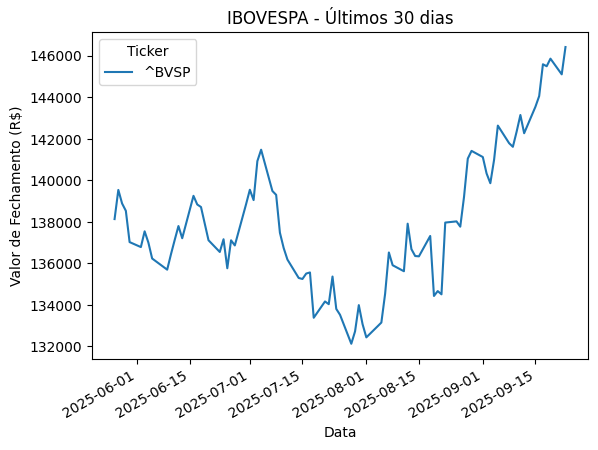

In [74]:
df_ibov.plot(title="IBOVESPA - Últimos 30 dias")
plt.xlabel("Data")  
plt.ylabel("Valor de Fechamento (R$)")


Media Movel: um dos indicadores mais usados na análise técnica, a média móvel suaviza as flutuações de preços, ajudando a identificar tendências de mercado ao longo do tempo.

Ticker              ^BVSP
Date                     
2025-05-26            NaN
2025-05-27            NaN
2025-05-28            NaN
2025-05-29            NaN
2025-05-30            NaN
...                   ...
2025-09-17  140664.809524
2025-09-18  141180.666667
2025-09-19  141721.333333
2025-09-22  142061.380952
2025-09-23  142461.377976

[86 rows x 1 columns]


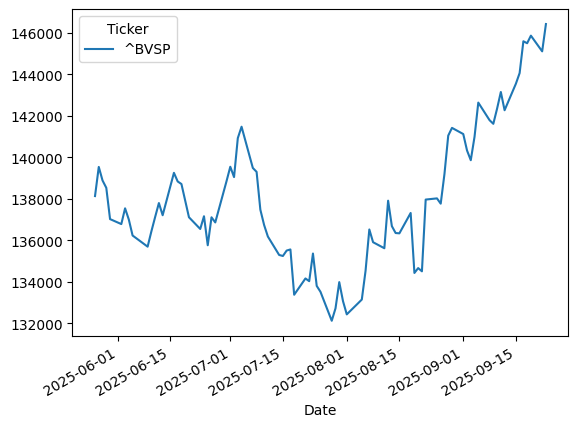

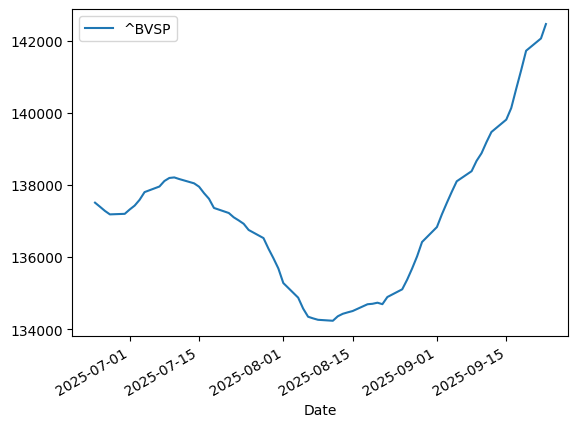

In [77]:
df_ibov.plot(label="IBOVESPA")
rolling_window = 21  # janela de 21 dias
media_movel = df_ibov.rolling(window=rolling_window).mean()
print(media_movel)
media_movel.plot(label="MMl-21")
plt.legend()
plt.show()